# MHEALTH (Mobile Health Dataset)

- (ref) UCI Machine Learning Repository
- 참가자 수: 10명
- 센서 종류
  - Chest, Arm, Ankle 3개의 Unit: 가속도계, 자이로스코프, 자기계
  - 심전도(ECG) 2 channel
- Sampling Freq: 50Hz
- No Nan data

## Labels
  `0`: 활동 없음\
  `1`: Standing still\
  `2`: Sitting and relaxing\
  `3`: Lying down\
  `4`: Walking\
  `5`: Climbing stairs\
  `6`: Waist bends forward\
  `7`: Frontal elevation of arms\
  `8`: Knees bending (crouching)\
  `9`: Cycling\
  `10`: Jogging\
  `11`: Running\
  `12`: Jumping

## Columns

- `0, 1, 2`: Chest – Acc (X, Y, Z) → 가속도계 (x, y, z)

- `3, 4`: Chest – ECG (1, 2) → 심전도 (2채널)

- `5, 6, 7`: Chest – Gyro (X, Y, Z) → 자이로스코프

- `8, 9, 10`: Chest – Mag (X, Y, Z) → 자기계

- `11, 12, 13`: Right Arm – Acc (X, Y, Z) → 팔 IMU - 가속도계

- `14, 15, 16`: Right Arm – Gyro (X, Y, Z) → 팔 IMU - 자이로스코프

- `17, 18, 19`: Left Ankle – Acc (X, Y, Z) → 발 IMU - 가속도계

- `20, 21, 22`: Left Ankle – Gyro (X, Y, Z) → 발 IMU - 자이로스코프

- `23`: Label → 정수값 (0=비활동, 1~12=활동 클래스)

## Rows
`-9.8184	0.009971	0.29563	0.0041863	0.0041863	2.1849	-9.6967	0.63077	0.1039	-0.84053	-0.68762	-0.37	-0.36327	0.29963	-8.6499	-4.5781	0.18776	-0.44902	-1.0103	0.034483	-2.35	-1.6102	-0.030899	0`

## Subject
- due date: 11/15 upload GitHub
1. LMM 제외 Full model source code
2. 5개 그룹으로 Cross-validation
3. No Data Augmentaion
4. 오직 모델로만 성능 향상
5. 상위 30%씩 차등 -> 성적에 반영
6. 모든 소스는 설명 가능해야함.
7. 재현성 보장하여 코딩


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Loading

In [2]:
import pandas as pd
import glob

files = sorted(glob.glob('/content/drive/MyDrive/Colab Notebooks/data/MHEALTHDATASET/*.log'))
subjects = [pd.read_csv(f, sep='\t', header=None) for f in files]

## Visualization

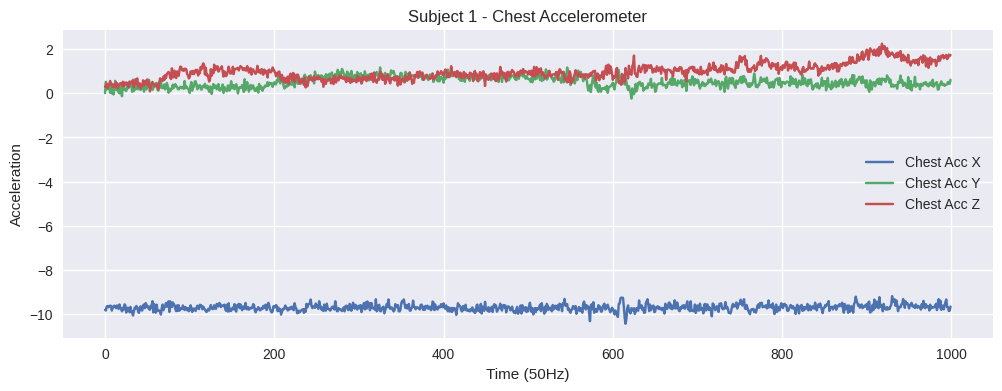

In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')


df = subjects[0]  # 첫 번째 참가자
time = range(len(df))

plt.figure(figsize=(12, 4))
plt.plot(time[:1000], df.iloc[:1000, 0], label="Chest Acc X")
plt.plot(time[:1000], df.iloc[:1000, 1], label="Chest Acc Y")
plt.plot(time[:1000], df.iloc[:1000, 2], label="Chest Acc Z")
plt.xlabel("Time (50Hz)")
plt.ylabel("Acceleration")
plt.legend()
plt.title("Subject 1 - Chest Accelerometer")
plt.show()

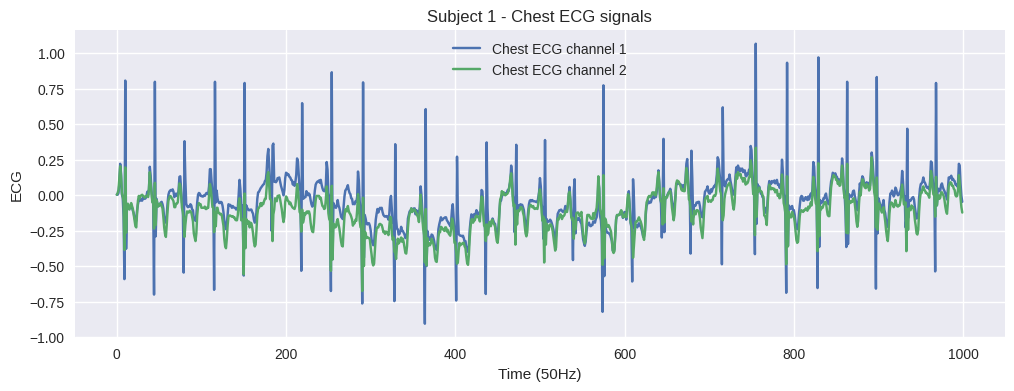

In [4]:
plt.figure(figsize=(12,4))
plt.plot(time[:1000], df.iloc[:1000, 3], label="Chest ECG channel 1")
plt.plot(time[:1000], df.iloc[:1000, 4], label="Chest ECG channel 2")
plt.xlabel("Time (50Hz)")
plt.ylabel("ECG")
plt.legend()
plt.title("Subject 1 - Chest ECG signals")
plt.show()

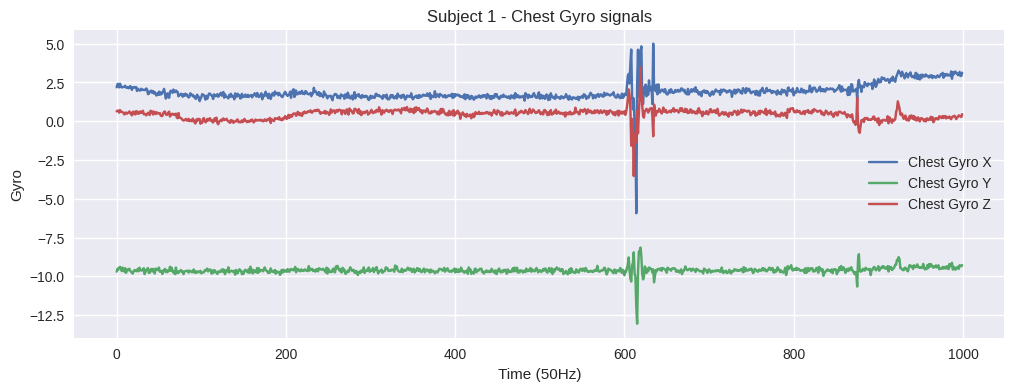

In [5]:
plt.figure(figsize=(12,4))
plt.plot(time[:1000], df.iloc[:1000, 5], label="Chest Gyro X")
plt.plot(time[:1000], df.iloc[:1000, 6], label="Chest Gyro Y")
plt.plot(time[:1000], df.iloc[:1000, 7], label="Chest Gyro Z")
plt.xlabel("Time (50Hz)")
plt.ylabel("Gyro")
plt.legend()
plt.title("Subject 1 - Chest Gyro signals")
plt.show()

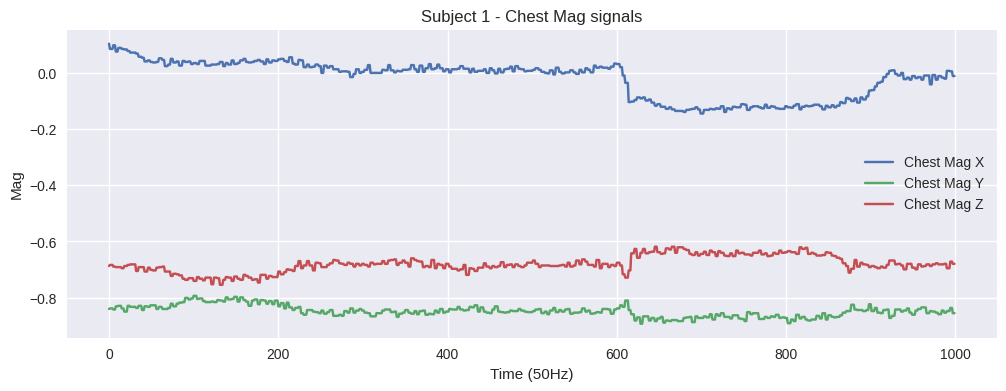

In [6]:
plt.figure(figsize=(12,4))
plt.plot(time[:1000], df.iloc[:1000, 8], label="Chest Mag X")
plt.plot(time[:1000], df.iloc[:1000, 9], label="Chest Mag Y")
plt.plot(time[:1000], df.iloc[:1000, 10], label="Chest Mag Z")
plt.xlabel("Time (50Hz)")
plt.ylabel("Mag")
plt.legend()
plt.title("Subject 1 - Chest Mag signals")
plt.show()

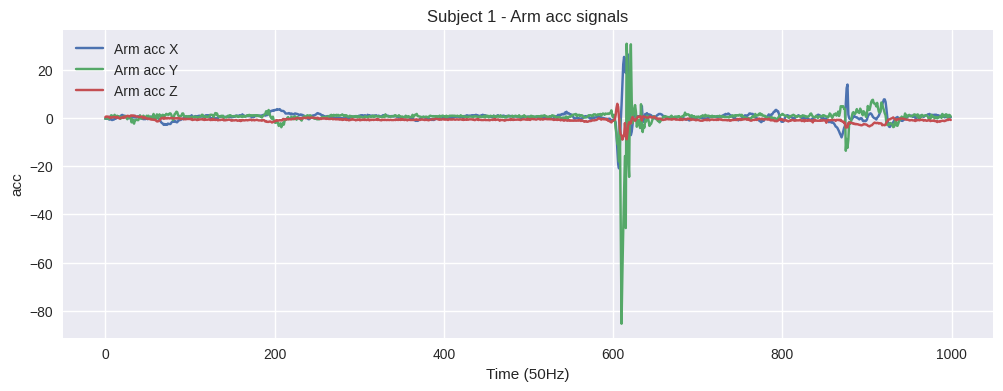

In [7]:
plt.figure(figsize=(12,4))
plt.plot(time[:1000], df.iloc[:1000, 11], label="Arm acc X")
plt.plot(time[:1000], df.iloc[:1000, 12], label="Arm acc Y")
plt.plot(time[:1000], df.iloc[:1000, 13], label="Arm acc Z")
plt.xlabel("Time (50Hz)")
plt.ylabel("acc")
plt.legend()
plt.title("Subject 1 - Arm acc signals")
plt.show()

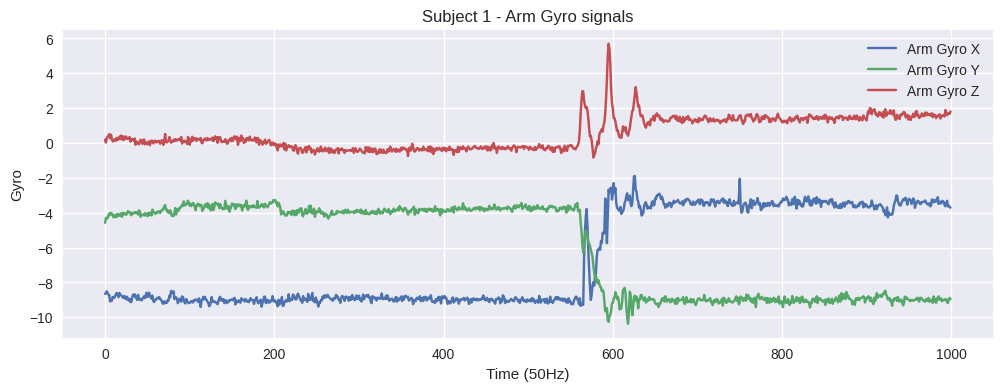

In [8]:
plt.figure(figsize=(12,4))
plt.plot(time[:1000], df.iloc[:1000, 14], label="Arm Gyro X")
plt.plot(time[:1000], df.iloc[:1000, 15], label="Arm Gyro Y")
plt.plot(time[:1000], df.iloc[:1000, 16], label="Arm Gyro Z")
plt.xlabel("Time (50Hz)")
plt.ylabel("Gyro")
plt.legend()
plt.title("Subject 1 - Arm Gyro signals")
plt.show()

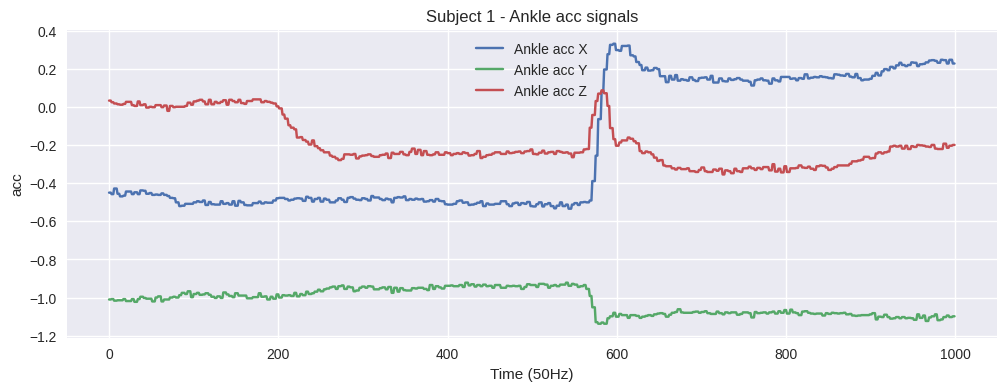

In [9]:
plt.figure(figsize=(12,4))
plt.plot(time[:1000], df.iloc[:1000, 17], label="Ankle acc X")
plt.plot(time[:1000], df.iloc[:1000, 18], label="Ankle acc Y")
plt.plot(time[:1000], df.iloc[:1000, 19], label="Ankle acc Z")
plt.xlabel("Time (50Hz)")
plt.ylabel("acc")
plt.legend()
plt.title("Subject 1 - Ankle acc signals")
plt.show()

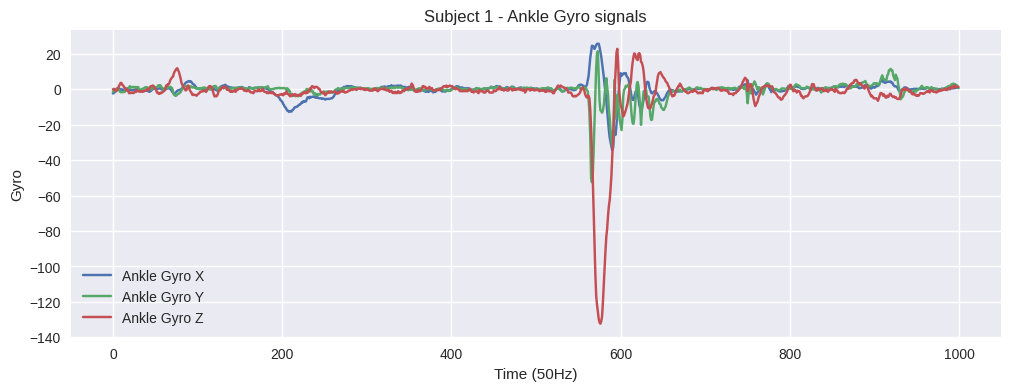

In [10]:
plt.figure(figsize=(12,4))
plt.plot(time[:1000], df.iloc[:1000, 20], label="Ankle Gyro X")
plt.plot(time[:1000], df.iloc[:1000, 21], label="Ankle Gyro Y")
plt.plot(time[:1000], df.iloc[:1000, 22], label="Ankle Gyro Z")
plt.xlabel("Time (50Hz)")
plt.ylabel("Gyro")
plt.legend()
plt.title("Subject 1 - Ankle Gyro signals")
plt.show()

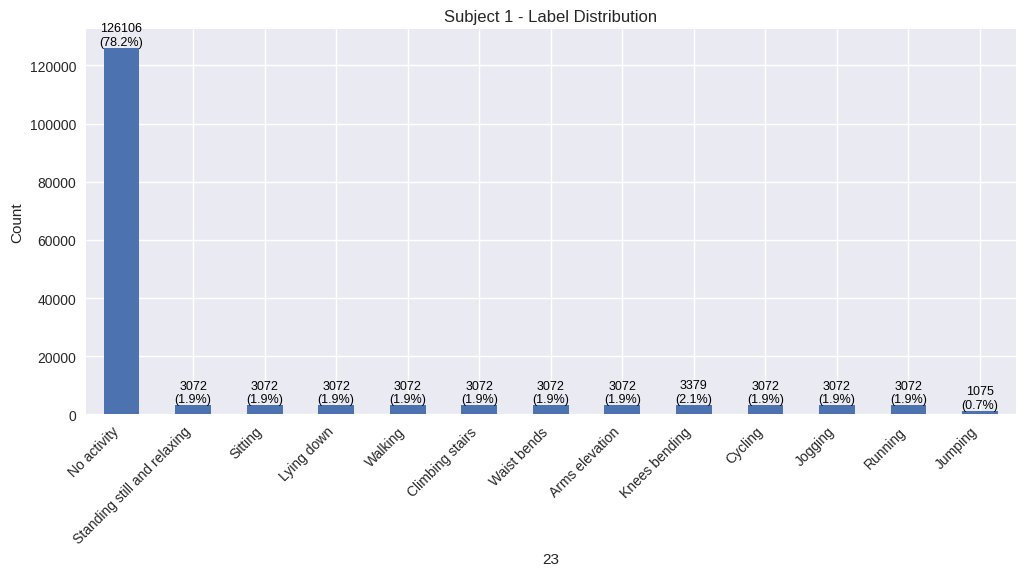

In [11]:
labels = {
    0: "No activity",
    1: "Standing still and relaxing",
    2: "Sitting",
    3: "Lying down",
    4: "Walking",
    5: "Climbing stairs",
    6: "Waist bends",
    7: "Arms elevation",
    8: "Knees bending",
    9: "Cycling",
    10: "Jogging",
    11: "Running",
    12: "Jumping"
}


counts = subjects[0].iloc[:, -1].value_counts().sort_index()
total = counts.sum()

plt.figure(figsize=(12,5))
ax = counts.plot(kind='bar')

ax.set_xticks(range(len(counts)))
ax.set_xticklabels([labels[i] for i in counts.index], rotation=45, ha='right')

plt.ylabel("Count")
plt.title("Subject 1 - Label Distribution")

for p, count in zip(ax.patches, counts):
    percentage = 100 * count / total
    ax.annotate(f"{count}\n({percentage:.1f}%)",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')

plt.show()

## Subject-Wise Split

In [12]:
train_subjects = subjects[:7]
val_subjects = subjects[7:9]
test_subjects = subjects[9:]

## Normalize

In [13]:
import numpy as np

def preprocess_acc(df):
    # ====== Norm. & Append Magnitude ======
    # chest_acc
    chest_acc = df.iloc[:, :3].copy()
    chest_acc = (chest_acc - chest_acc.mean()) / chest_acc.std()  # z-score norm.

    # arm_acc
    arm_acc = df.iloc[:, 12:15].copy()
    arm_acc = (arm_acc - arm_acc.mean()) / arm_acc.std()

    # ankle_acc
    ankle_acc = df.iloc[:, 18:21].copy()
    ankle_acc = (ankle_acc - ankle_acc.mean()) / ankle_acc.std()

    # concat features
    features = pd.concat([chest_acc, arm_acc, ankle_acc], axis=1)
    labels = df.iloc[:, -1]
    return features, labels

In [14]:
def preprocess_gyro(df):
    # chest_gyro (cols 6~8)
    chest_gyro = df.iloc[:, 6:9].copy()
    chest_gyro = (chest_gyro - chest_gyro.mean()) / chest_gyro.std()

    # arm_gyro (cols 15~17)
    arm_gyro = df.iloc[:, 15:18].copy()
    arm_gyro = (arm_gyro - arm_gyro.mean()) / arm_gyro.std()

    # ankle_gyro (cols 21~23)
    ankle_gyro = df.iloc[:, 21:24].copy()
    ankle_gyro = (ankle_gyro - ankle_gyro.mean()) / ankle_gyro.std()

    # 합치기
    features = pd.concat([chest_gyro, arm_gyro, ankle_gyro], axis=1)
    return features

In [15]:
def preprocess_mag(df):
    # chest_mag
    chest_mag = df.iloc[:, 9:12].copy()
    chest_mag = (chest_mag - chest_mag.mean()) / chest_mag.std()

    features = chest_mag
    return features

In [16]:
def preprocess_ecg(df, mean=None, std=None):
    # chest_ecg
    chest_ecg = df.iloc[:, 3:5].copy()

    if mean is None or std is None:
        mean = chest_ecg.mean(axis=0)
        std = chest_ecg.std(axis=0) + 1e-8

    chest_ecg = (chest_ecg - mean) / std

    features = chest_ecg
    return features

In [17]:
processed = []

for df in subjects:
    acc_X, y = preprocess_acc(df)
    gyro_X = preprocess_gyro(df)
    mag_X = preprocess_mag(df)
    ecg_X = preprocess_ecg(df)
    X = pd.concat([acc_X, gyro_X, mag_X, ecg_X], axis=1)
    processed.append((X, y))

## Sliding Windows

In [18]:
def make_windows(features, labels, window_size=250, step=125):
    X, y = [], []
    n = len(features)

    for i in range(0, n - window_size, step):
        window_X = features.iloc[i: i+window_size].values
        window_y = labels.iloc[i: i+window_size].values

        unique, counts = np.unique(window_y, return_counts=True)
        main_label = unique[np.argmax(counts)]
        ratio = counts.max() / window_size

        X.append(window_X)
        y.append(main_label)

    return np.array(X), np.array(y)

## `torch.from_numpy` & Dataset, DataLoader

In [19]:
import torch
from torch.utils.data import TensorDataset, DataLoader

def make_dataset(subjects, window_size=250, step=125):
    windowed = []
    for df in subjects:
        # 라벨 0 제거
        df = df[df.iloc[:, -1] != 0].reset_index(drop=True)

        acc_X, y = preprocess_acc(df)
        gyro_X   = preprocess_gyro(df)
        mag_X    = preprocess_mag(df)
        ecg_X    = preprocess_ecg(df)

        X = pd.concat([acc_X, gyro_X, mag_X, ecg_X], axis=1)
        X_win, y_win = make_windows(X, y, window_size, step)
        windowed.append((X_win, y_win))

    X_all = np.concatenate([X for X, _ in windowed], axis=0)
    y_all = np.concatenate([y for _, y in windowed], axis=0)

    y_all = y_all - 1  # 0 index부터 model에서 받길 원함

    return TensorDataset(torch.from_numpy(X_all).float(),
                         torch.from_numpy(y_all).long())

In [20]:
train_dataset = make_dataset(train_subjects)
val_dataset   = make_dataset(val_subjects)
test_dataset  = make_dataset(test_subjects)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [21]:
print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

1920
538
273


## Create Models

In [22]:
import torch.nn as nn

# 1. LSTM
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, num_layers=2, num_classes=12):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        out, _ = self.lstm(x)          # (batch, T, hidden)
        out = out[:, -1, :]            # 마지막 시퀀스만 사용
        return self.fc(out)

# 2. CNN
class CNNClassifier(nn.Module):
    def __init__(self, input_dim, num_classes=12):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels=input_dim, out_channels=64, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU()
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = x.permute(0, 2, 1)         # (batch, C, T)
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.pool(x).squeeze(-1)   # (batch, 64)
        return self.fc(x)

# 3. CNN + LSTM
class CNNLSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, num_layers=1, num_classes=12):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels=input_dim, out_channels=64, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU()
        self.lstm = nn.LSTM(64, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = x.permute(0, 2, 1)         # (batch, C, T)
        x = self.relu(self.bn1(self.conv1(x)))
        x = x.permute(0, 2, 1)         # (batch, T, 64)
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        return self.fc(out)

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_dim = train_dataset.tensors[0].shape[2]  # feature 개수 (N, T, C)
num_classes = len(torch.unique(train_dataset.tensors[1]))  # y_tensor (12개)

models = {
    "LSTM": LSTMClassifier(input_dim, num_classes=num_classes).to(device),
    "CNN": CNNClassifier(input_dim, num_classes=num_classes).to(device),
    "CNN+LSTM": CNNLSTMClassifier(input_dim, num_classes=num_classes).to(device),
}

## Training Model

In [24]:
import torch.optim as optim

def train(model, train_loader, val_loader, epochs=15, lr=1e-3):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}

    for epoch in range(epochs):
        # ---- Train ----
        model.train()
        total_loss, correct, total = 0, 0, 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)

            optimizer.zero_grad()
            outputs = model(xb)
            loss = criterion(outputs, yb)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, preds = outputs.max(1)
            correct += preds.eq(yb).sum().item()
            total += yb.size(0)

        train_loss = total_loss / len(train_loader)
        train_acc = correct / total

        # ---- Validation ----
        model.eval()
        val_loss, val_correct, val_total = 0, 0, 0
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                outputs = model(xb)
                loss = criterion(outputs, yb)
                val_loss += loss.item()
                _, preds = outputs.max(1)
                val_correct += preds.eq(yb).sum().item()
                val_total += yb.size(0)

        val_loss /= len(val_loader)
        val_acc = val_correct / val_total

        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_acc)

        print(f"Epoch {epoch+1}: "
              f"Train Loss={train_loss:.4f}, Acc={train_acc:.4f} | "
              f"Val Loss={val_loss:.4f}, Acc={val_acc:.4f}")

    return history


In [25]:
histories = {}

for name, model in models.items():
    print(f"\n===== Training {name} =====")
    histories[name] = train(model, train_loader, val_loader, epochs=15)


===== Training LSTM =====
Epoch 1: Train Loss=2.0522, Acc=0.3807 | Val Loss=1.3571, Acc=0.6208
Epoch 2: Train Loss=0.9637, Acc=0.6927 | Val Loss=0.9796, Acc=0.6822
Epoch 3: Train Loss=0.6292, Acc=0.7880 | Val Loss=0.8293, Acc=0.6822
Epoch 4: Train Loss=0.6138, Acc=0.7812 | Val Loss=0.7620, Acc=0.7565
Epoch 5: Train Loss=0.5626, Acc=0.8099 | Val Loss=0.8410, Acc=0.7286
Epoch 6: Train Loss=0.4937, Acc=0.8417 | Val Loss=0.7422, Acc=0.7639
Epoch 7: Train Loss=0.3779, Acc=0.8875 | Val Loss=0.9992, Acc=0.6784
Epoch 8: Train Loss=0.2951, Acc=0.9062 | Val Loss=0.7621, Acc=0.7584
Epoch 9: Train Loss=0.4020, Acc=0.8542 | Val Loss=0.9556, Acc=0.6859
Epoch 10: Train Loss=0.3537, Acc=0.8896 | Val Loss=0.6923, Acc=0.8048
Epoch 11: Train Loss=0.2820, Acc=0.9208 | Val Loss=0.5762, Acc=0.8104
Epoch 12: Train Loss=0.3469, Acc=0.8703 | Val Loss=0.6520, Acc=0.8606
Epoch 13: Train Loss=0.3204, Acc=0.8818 | Val Loss=0.5608, Acc=0.8420
Epoch 14: Train Loss=0.2578, Acc=0.9115 | Val Loss=0.8265, Acc=0.7621
Ep

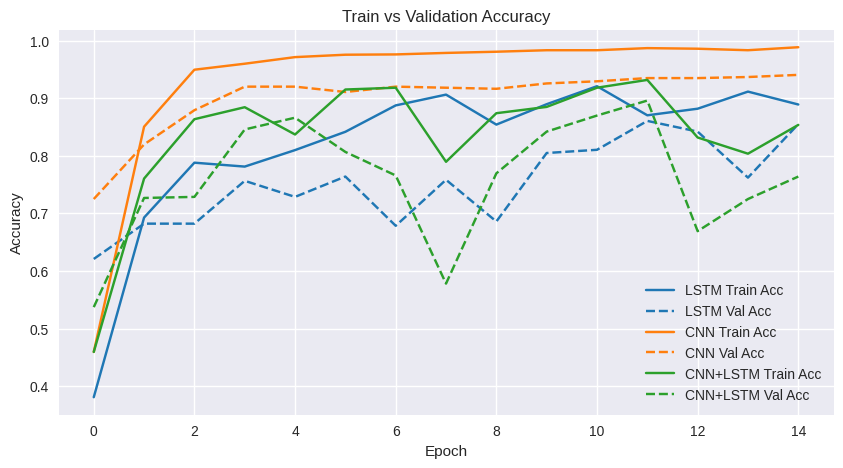

In [28]:
import matplotlib.pyplot as plt

# 색상 팔레트 (모델 이름 순서에 맞춰 자동 할당)
colors = plt.cm.tab10.colors

plt.figure(figsize=(10,5))

for i, (name, hist) in enumerate(histories.items()):
    color = colors[i % len(colors)]  # 모델마다 고유 색상
    # Train Acc (실선)
    plt.plot(hist["train_acc"], label=f"{name} Train Acc", color=color, linestyle='-')
    # Val Acc (점선)
    plt.plot(hist["val_acc"], label=f"{name} Val Acc", color=color, linestyle='--')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
def evaluate(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            outputs = model(xb)
            _, preds = outputs.max(1)
            correct += preds.eq(yb).sum().item()
            total += yb.size(0)
    return correct / total

for name, model in models.items():
    test_acc = evaluate(model, test_loader)
    print(f"{name} Test Accuracy: {test_acc:.4f}")


LSTM Test Accuracy: 0.9487
CNN Test Accuracy: 0.9744
CNN+LSTM Test Accuracy: 0.8571
